In [ ]:
!pip install tabula-py
!pip install pdfplumber
!pip install jpype1

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabula import read_pdf

In [ ]:
!git clone https://github.com/madhoolikacvss/CSE151A_Project.git


fatal: destination path 'CSE151A_Project' already exists and is not an empty directory.


In [ ]:
!cd CSE151A_Project && git pull

Already up to date.


In [ ]:
# CROP is Zooplankton data from 2000 to 2021
fdf = read_pdf("/content/CSE151A_Project/ZooDBCrop.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf)):
  print(len(fdf[i].columns))
  print(fdf[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs = []
for df in fdf:
    df.columns = headers
    cleaned_dfs.append(df)
combined_df = pd.concat(cleaned_dfs, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 1404', 'N/A', '2014-\r04-07', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '19,116.7', '10', 'Pooled'],
      dtype='object')


In [ ]:
# CROP2 is Zooplankton data from 1980 to 1999
fdf2 = read_pdf("/content/CSE151A_Project/ZooDBCrop2.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf2)):
  print(len(fdf2[i].columns))
  print(fdf2[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs2 = []
for df in fdf2:
    df.columns = headers
    cleaned_dfs2.append(df)
combined_df2 = pd.concat(cleaned_dfs2, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 9304', 'N/A', '1993-04-\r05', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '7,891.3', '10', 'Pooled'],
      dtype='object')


In [ ]:
dataset = pd.concat([combined_df, combined_df2], axis=0, ignore_index=True)
print("shape:",dataset.shape)

shape: (62, 13)


In [ ]:
# These columns all have N/A value. So we have to drop them.
dataset = dataset.drop(columns=['Tows','TowBegin', 'Ship', 'Source', 'Line',	'TowEnd', 'Longitude', 'Cruise', 'Station',	'Latitude'])
dataset = dataset.dropna()

In [ ]:
dataset

,Date,Region,Abundance
0,2000-\r04-13,SC,"30,910.5"
1,2001-\r04-13,SC,"25,181.6"
2,2002-\r04-03,SC,"34,504.3"
3,2003-\r04-10,SC,"71,990.2"
4,2003-\r04-22,CC,"7,878.5"
...,...,...,...
57,1990-04-\r23,SC,"10,784.0"
58,1992-04-\r21,SC,"5,464.0"
59,1994-03-\r29,SC,"9,820.2"
60,1996-04-\r22,SC,"25,972.5"


The data in the column Region is one of the two values 'SC' or 'CC'. It has no order so using One - Hot Encoding. We can use 1 for 'SC' and 0 for 'CC', but by doing this we are giving an order to these values where there is no true zero. That is why we are prefering One Hot Encoding as this data is nominal.

In [ ]:
# Binary Encoding
dataset = pd.get_dummies(dataset, columns=['Region'])
dataset['Region'] = dataset['Region_SC']
dataset.drop(['Region_CC', 'Region_SC'], axis=1, inplace=True)
dataset['Region'] = dataset['Region'].astype(int)
dataset

,Date,Abundance,Region
0,2000-\r04-13,"30,910.5",1
1,2001-\r04-13,"25,181.6",1
2,2002-\r04-03,"34,504.3",1
3,2003-\r04-10,"71,990.2",1
4,2003-\r04-22,"7,878.5",0
...,...,...,...
57,1990-04-\r23,"10,784.0",1
58,1992-04-\r21,"5,464.0",1
59,1994-03-\r29,"9,820.2",1
60,1996-04-\r22,"25,972.5",1


In [ ]:
dataset['Year'] = dataset['Date'].str.extract(r'(\d{4})')
dataset.drop(columns=['Date'], inplace=True)
dataset

,Abundance,Region,Year
0,"30,910.5",1,2000
1,"25,181.6",1,2001
2,"34,504.3",1,2002
3,"71,990.2",1,2003
4,"7,878.5",0,2003
...,...,...,...
57,"10,784.0",1,1990
58,"5,464.0",1,1992
59,"9,820.2",1,1994
60,"25,972.5",1,1996


In [ ]:
dataset = dataset.sort_values(by='Year', ascending=True)
dataset.reset_index(drop=True, inplace=True)
dataset

,Abundance,Region,Year
0,"11,163.0",0,1980
1,"28,034.9",1,1981
2,"25,251.0",0,1981
3,"19,073.7",1,1982
4,"37,393.1",0,1982
...,...,...,...
57,"9,438.3",1,2017
58,"16,864.2",0,2017
59,"22,759.8",0,2018
60,"16,205.6",1,2018


In [ ]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Abundance  62 non-null     object
 1   Region     62 non-null     int64 
 2   Year       62 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,Abundance,Region,Year
0,"11,163.0",0,1980
1,"28,034.9",1,1981
2,"25,251.0",0,1981
3,"19,073.7",1,1982
4,"37,393.1",0,1982
...,...,...,...
57,"9,438.3",1,2017
58,"16,864.2",0,2017
59,"22,759.8",0,2018
60,"16,205.6",1,2018


In [ ]:
dataset['Abundance'] = dataset['Abundance'].str.replace(',', '', regex=False)
dataset['Abundance'] = pd.to_numeric(dataset['Abundance'], errors='coerce')

In [ ]:
dataset

,Abundance,Region,Year
0,11163.0,0,1980
1,28034.9,1,1981
2,25251.0,0,1981
3,19073.7,1,1982
4,37393.1,0,1982
...,...,...,...
57,9438.3,1,2017
58,16864.2,0,2017
59,22759.8,0,2018
60,16205.6,1,2018


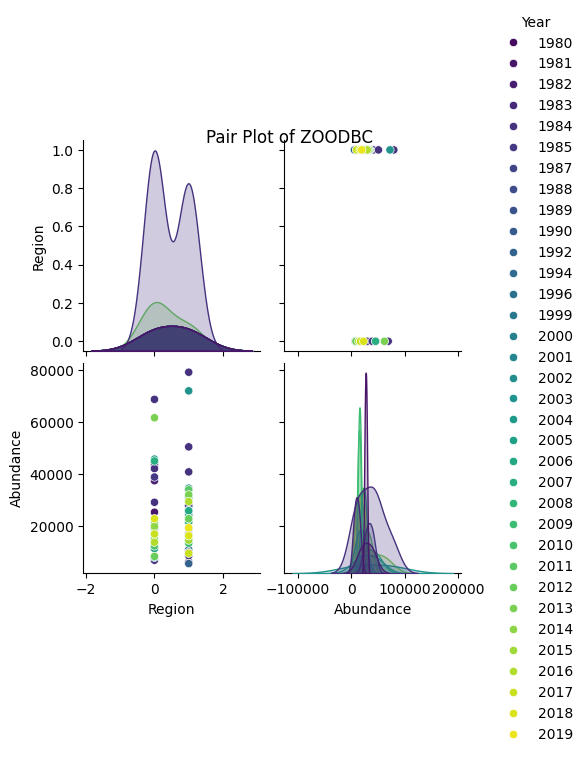

In [ ]:
#Pairplot
sns.pairplot(dataset, vars=["Region", "Abundance"], hue="Year", palette="viridis")
# Color coded by Date, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of ZOODBC", y=1)
plt.show()

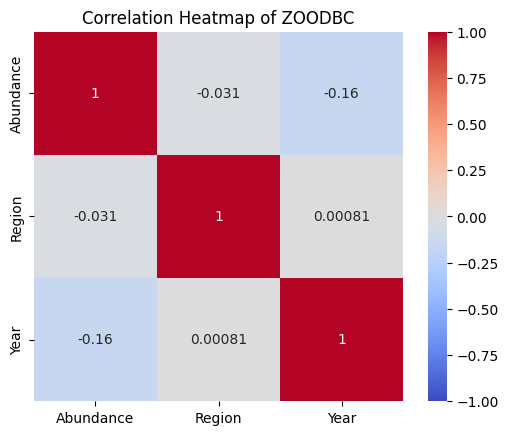

In [ ]:
matrix = dataset.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of ZOODBC")
plt.show()

# Abundance Model
So our first dataset that contains columns 'Abundance' and 'Year' has only 62 rows where as our second dataset has 1374 rows. We want to use the columns/ features such as "Depth", "Salinity", "Temp", "d13C-DIC", "DIC", "ALK" from the second dataset to predict the 'Abundance'.

The problem we have now is that we have to map the 'Abundance' from 62 rows(62 different points of time) to the 1374 samples in the second dataset. For this we have to assign a value for each of these samples based on the year (calculated from date) and assign an 'Abundance' value to that sample.

So we have created a regression model that predicts the 'Abundance' given a 'Year' based on our first dataset and assign the predict values of 'Abundance' to the corresponding samples in the second dataset.

## Why a model instead of directly mapping the 'Abundance' from the first dataset?

While we can just map the 'Abundance' from the first dataset, for instance the value of 'Abundance' in the year 2000 is 30910.5 and we can assign 30910.5 as the Abundance to all the samples from the second dataset with year 2000, it is not the best solution we can have as we assign the same Abundance values to all the samples in the same year.

To solve this, we plan on further improving the model in Milestone 4 by predicting 'Abundance' based on the date so we can get different 'Abundance' values for different samples belonging to the same year. This can be done by using a fractional year format for the dates such as June 22, 1989 can be 1989.474 .

For this reason using a model to predict abundance as we can modify it later to adapt to dates instead of year.

##Trainging abundance model - used to train our final model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
# Preparing the dataset
X = dataset[['Year']]  # Feature
y = dataset['Abundance']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
abundanceModel = LinearRegression()
abundanceModel.fit(X_train, y_train)

# Making predictions
y_pred = abundanceModel.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {maep}")

# Displaying the model coefficients
print(f"Intercept: {abundanceModel.intercept_}")
print(f"Coefficient: {abundanceModel.coef_[0]}")

Mean Squared Error: 291026395.0955659
Mean Absolute Error: 13442.237757752046
Mean Absolute Percentage Error: 1.0694948628717071
Intercept: 436464.31557851576
Coefficient: -205.44300482297058


#DATASET 2 (BATA+BERM+HAWI):

# What is Dataset 2
The dataset includes key columns: Station, Depth, Salinity. To facilitate analysis, we applied Min-Max normalization to the continuous variables: Depth, Salinity, Temp, d13C-DIC, DIC, and ALK, scaling them to a range of 0 to 1. This ensures all features can be compared fairly and prevents any single variable from skewing our results.

In [ ]:
!cd CSE151A_Project/ && ls


 BATS.csv		       HAWI.csv       LDL_2023.csv   Project.ipynb   ZooDBCrop2.pdf
 BERM.csv		       LDL_2021.csv   LDL_2024.csv   README.md	     ZooDBCrop.pdf
'CSE 151A ZooDB Results.csv'   LDL_2022.csv  'Meeting Log'   ZooDB-2.pdf     ZooDB.pdf


In [ ]:
!cd CSE151A_Project && git pull

Already up to date.


In [ ]:
# BATS(1)
dataset2 = pd.read_csv('/content/CSE151A_Project/BATS.csv')
print(dataset2.columns)

# BERM
dataset3 = pd.read_csv('/content/CSE151A_Project/BERM.csv')
print(dataset3.columns)

# HAWI
dataset4 = pd.read_csv('/content/CSE151A_Project/HAWI.csv')
print(dataset4.columns)

combined_dataset = pd.concat([dataset2, dataset3, dataset4], ignore_index=True)

Index(['Station', ' Sample', '  Excel', 'Date', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')
Index(['Station', ' Sample', '  Excel', ' Decimal', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')
Index(['Station', ' Sample', '  Excel', ' Decimal', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')


In [ ]:
combined_dataset = combined_dataset.drop(columns=['Station', '  Excel', ' Decimal' , 'Date'])


In [ ]:
combined_dataset


,Sample,Depth,Salinity,Temp,d13C-DIC,DIC,ALK
0,1989-01-29,18,36.645,20.79,1.48,2039.48,2395.04
1,1990-06-22,1,36.456,24.99,1.36,2031.94,2384.17
2,1990-06-22,10,36.467,24.33,1.4,2031.79,2378.03
3,1990-07-18,2,36.456,27.35,1.38,2030.62,2378.91
4,1990-07-18,10,36.454,27.25,1.39,2030.89,2377.16
...,...,...,...,...,...,...,...
1376,2016-04-14,5,34.9048,NaN,0.857,1985.86,2299.36
1377,2016-07-11,5,34.8889,NaN,0.896,1986.13,2300.035
1378,2016-08-09,5,34.8994,NaN,0.818,1987.6,2296.475
1379,2016-10-15,5,34.9704,NaN,0.881,1987.44,2301.61


In [ ]:
combined_dataset = combined_dataset.rename(columns={
    " Sample": "Sample",
    " Depth": "Depth",
    "   Salinity": "Salinity",
    "    Temp": "Temp",
    " d13C-DIC": "d13C-DIC",
    "  DIC": "DIC",
    "   ALK": "ALK"
})


In [ ]:
combined_dataset.columns = combined_dataset.columns.str.strip()


In [ ]:
combined_dataset['Year'] = combined_dataset['Sample'].str.extract(r'(\d{4})')
combined_dataset.drop(columns=['Sample'], inplace=True)
combined_dataset.columns = combined_dataset.columns.str.strip()


In [ ]:
combined_dataset = combined_dataset.apply(pd.to_numeric, errors='coerce')

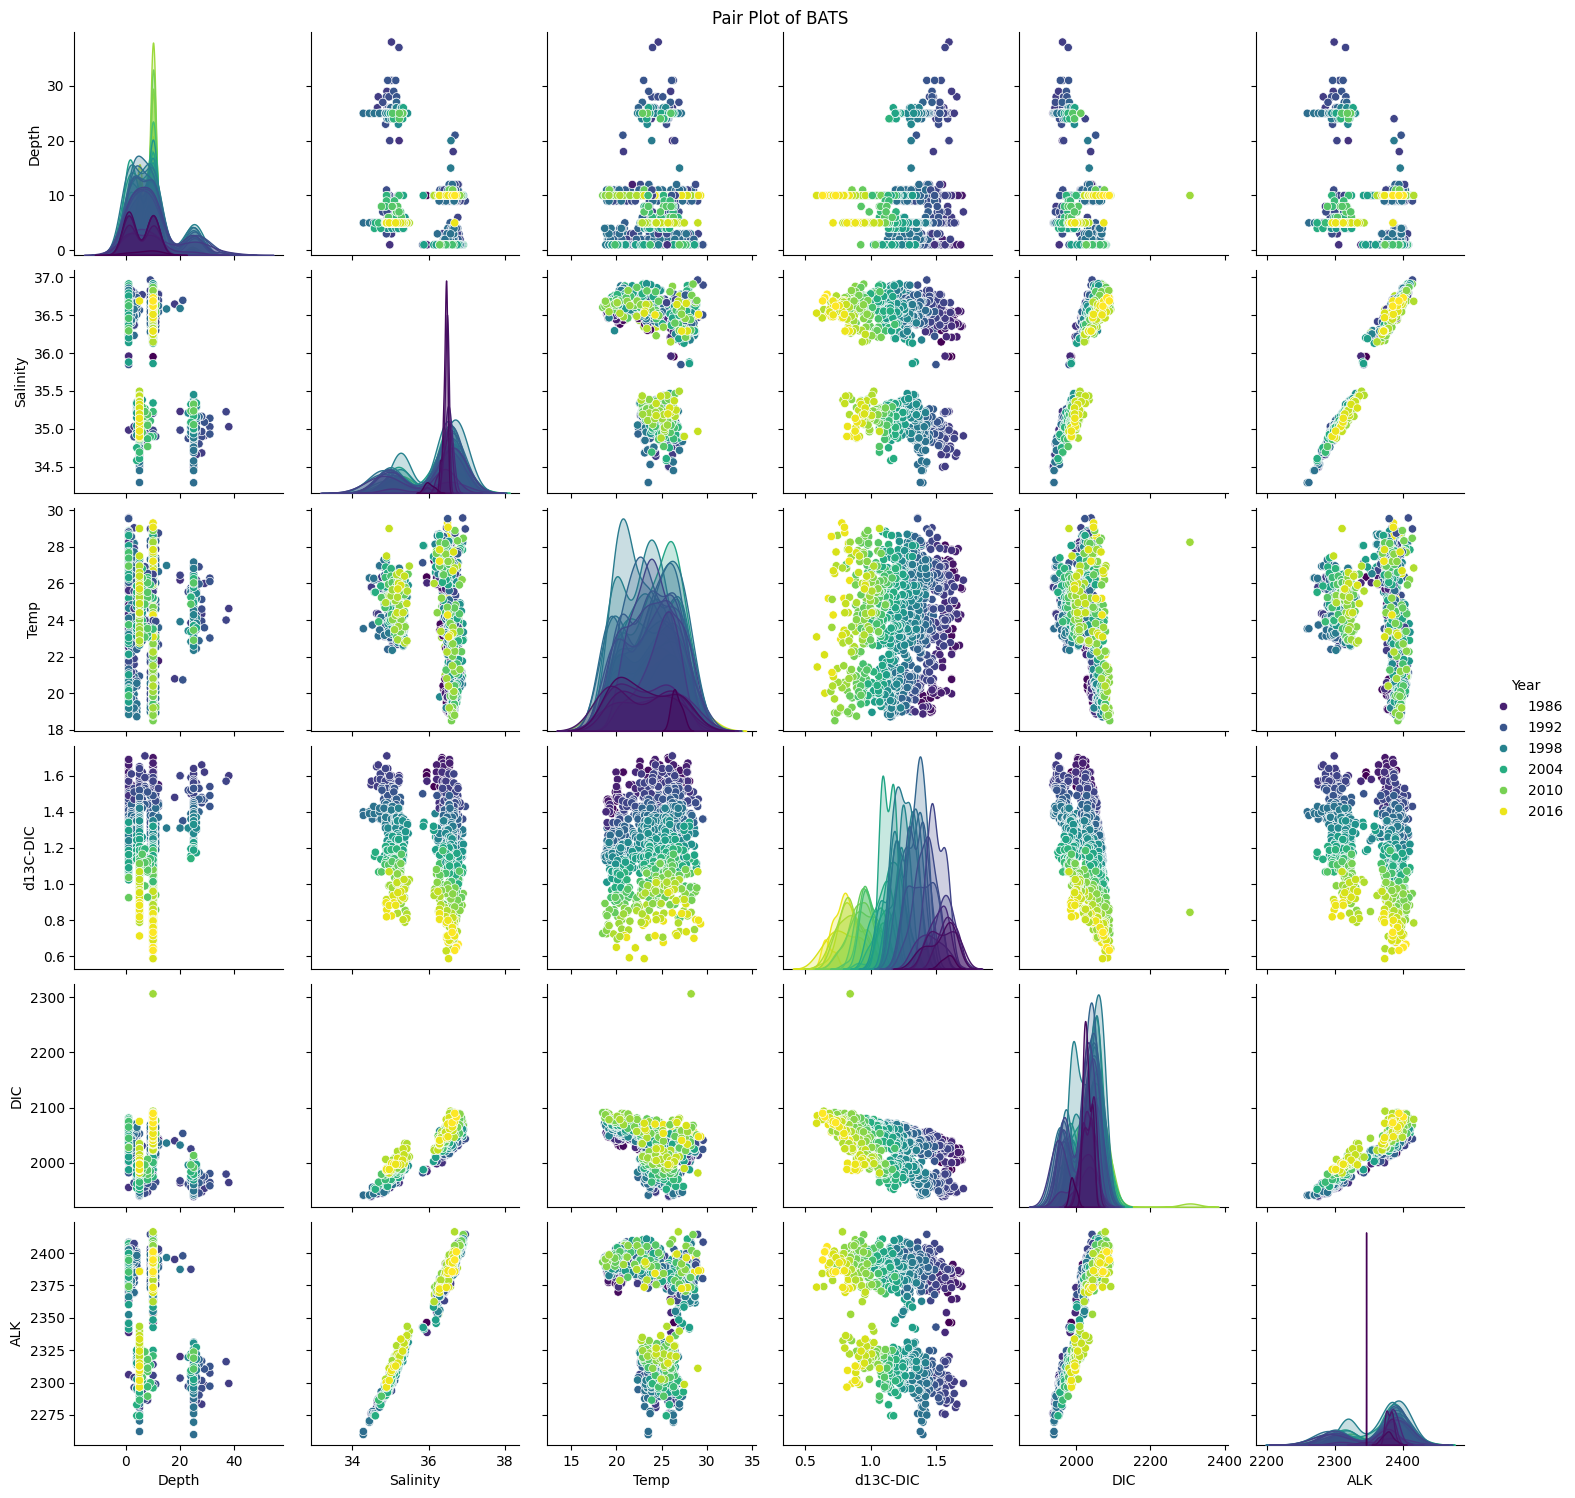

In [ ]:
#Pairplot
sns.pairplot(combined_dataset, vars=["Depth", "Salinity", "Temp", "d13C-DIC", "DIC", "ALK"], hue="Year", palette="viridis")
# Color coded by Year, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of BATS", y=1)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['Depth', 'Salinity', 'Temp', 'd13C-DIC', 'DIC', 'ALK']
combined_dataset[numeric_columns] = combined_dataset.groupby('Year')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

# Apply MinMaxScaler
scaler = MinMaxScaler()
combined_dataset[numeric_columns] = scaler.fit_transform(combined_dataset[numeric_columns])

combined_dataset

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year
0,0.459459,0.881077,0.206679,0.795374,0.275276,0.863898,1989
1,0.000000,0.810396,0.585740,0.688612,0.254811,0.794441,1990
2,0.243243,0.814510,0.526173,0.724199,0.254404,0.755208,1990
3,0.027027,0.810396,0.798736,0.706406,0.251228,0.760831,1990
4,0.243243,0.809648,0.789711,0.715302,0.251961,0.749649,1990
...,...,...,...,...,...,...,...
1376,0.108108,0.230292,0.691918,0.241103,0.129740,0.252524,2016
1377,0.108108,0.224346,0.691918,0.275801,0.130473,0.256837,2016
1378,0.108108,0.228272,0.691918,0.206406,0.134462,0.234089,2016
1379,0.108108,0.254824,0.691918,0.262456,0.134028,0.266901,2016


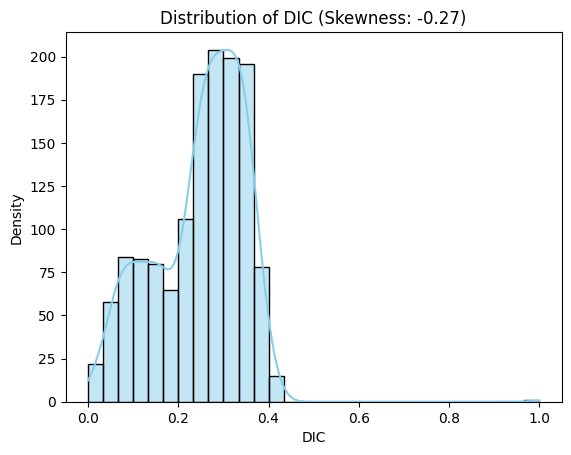

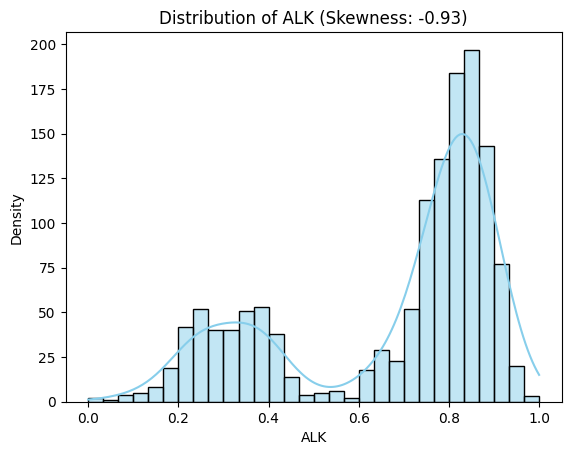

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

columns_of_interest = ['DIC', 'ALK']

# Convert columns to numeric values (force errors to NaN if non-numeric)
combined_dataset[columns_of_interest] = combined_dataset[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Now plot the histogram with KDE
for col in columns_of_interest:
    # Plot the histogram with KDE
    sns.histplot(combined_dataset[col].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col} (Skewness: {skew(combined_dataset[col].dropna()):.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()



In [ ]:
#feature expantion: adding a column for the ratio of DIC and ALK - it hels in capturing carbonate equilibrium
combined_dataset = combined_dataset[combined_dataset['ALK'] != 0]
combined_dataset['DIC_ALK_Ratio'] = combined_dataset['DIC'] / combined_dataset['ALK']

combined_dataset

<ipython-input-30-c1ac0ec77658>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset['DIC_ALK_Ratio'] = combined_dataset['DIC'] / combined_dataset['ALK']


,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year,DIC_ALK_Ratio
0,0.459459,0.881077,0.206679,0.795374,0.275276,0.863898,1989,0.318644
1,0.000000,0.810396,0.585740,0.688612,0.254811,0.794441,1990,0.320742
2,0.243243,0.814510,0.526173,0.724199,0.254404,0.755208,1990,0.336866
3,0.027027,0.810396,0.798736,0.706406,0.251228,0.760831,1990,0.330202
4,0.243243,0.809648,0.789711,0.715302,0.251961,0.749649,1990,0.336106
...,...,...,...,...,...,...,...,...
1376,0.108108,0.230292,0.691918,0.241103,0.129740,0.252524,2016,0.513772
1377,0.108108,0.224346,0.691918,0.275801,0.130473,0.256837,2016,0.507997
1378,0.108108,0.228272,0.691918,0.206406,0.134462,0.234089,2016,0.574406
1379,0.108108,0.254824,0.691918,0.262456,0.134028,0.266901,2016,0.502164


#Part 2: Training our first model

In [ ]:
# Creating a column abundance in combined_dataset based on abundanceModel prediction on year
combined_dataset['Abundance'] = abundanceModel.predict(combined_dataset['Year'].values.reshape(-1, 1))
combined_dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-57-1e05462c7e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset['Abundance'] = abundanceModel.predict(combined_dataset['Year'].values.reshape(-1, 1))


,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year,DIC_ALK_Ratio,Abundance
0,0.459459,0.881077,0.206679,0.795374,0.275276,0.863898,1989,0.318644,27838.178986
1,0.000000,0.810396,0.585740,0.688612,0.254811,0.794441,1990,0.320742,27632.735981
2,0.243243,0.814510,0.526173,0.724199,0.254404,0.755208,1990,0.336866,27632.735981
3,0.027027,0.810396,0.798736,0.706406,0.251228,0.760831,1990,0.330202,27632.735981
4,0.243243,0.809648,0.789711,0.715302,0.251961,0.749649,1990,0.336106,27632.735981
...,...,...,...,...,...,...,...,...,...
1376,0.108108,0.230292,0.691918,0.241103,0.129740,0.252524,2016,0.513772,22291.217855
1377,0.108108,0.224346,0.691918,0.275801,0.130473,0.256837,2016,0.507997,22291.217855
1378,0.108108,0.228272,0.691918,0.206406,0.134462,0.234089,2016,0.574406,22291.217855
1379,0.108108,0.254824,0.691918,0.262456,0.134028,0.266901,2016,0.502164,22291.217855


In [ ]:
# Dropping additional na values
# Checking for NaN values in the dataset
nan_summary = combined_dataset.isnull().sum()

# Displaying columns with their respective count of NaN values
print("NaN values in each column:")
print(nan_summary)

# Optionally, filter columns that contain NaN values
nan_columns = nan_summary[nan_summary > 0]
print("\nColumns with NaN values:")
print(nan_columns)

combined_dataset = combined_dataset.dropna()
print(combined_dataset.shape)

NaN values in each column:
Depth            0
Salinity         0
Temp             6
d13C-DIC         0
DIC              0
ALK              0
Year             0
DIC_ALK_Ratio    0
Abundance        0
dtype: int64

Columns with NaN values:
Temp    6
dtype: int64
(1374, 9)


In [ ]:
# Example data: Replace this with loading your actual dataset
# For example, you can load the dataset as a CSV
# dataset = pd.read_csv("your_dataset.csv")
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,explained_variance_score,r2_score

# extracting our feature vector from the combined_dataset (BATS+BERM+HAWI)
# extracting our lable's vector from Zooplankton dataset
X = combined_dataset[['DIC', 'ALK', 'Depth', 'Salinity', 'Temp', 'd13C-DIC','DIC_ALK_Ratio']]
y = combined_dataset['Abundance']

# combined_dataset has 1381 rows/samples where as dataset has only 62 rows/samples.
# Either map Abundance from the dataset to each sample in combined_dataset based on Year
# Or map average values of ['DIC', 'ALK', 'Depth', 'Salinity', 'Temp', 'd13C-DIC'] over a year to each year's abundance in dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_val_pred = model.predict(X_val) # Prediction for
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_maep = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs = explained_variance_score(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

validation_mse = mean_squared_error(y_val, y_val_pred)
validation_mae = mean_absolute_error(y_val, y_val_pred)
validation_maep = mean_absolute_percentage_error(y_val, y_val_pred)
validation_evs = explained_variance_score(y_val, y_val_pred)
validation_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_maep = mean_absolute_percentage_error(y_train, y_train_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nValidation Metrics:")
print(f"Validation Mean Squared Error: {validation_mse:.12f}")
print(f"Validation Mean Absolute Error (MAE): {validation_mae}")
print(f"Validation Mean Absolute Error Percentage (MAE): {validation_maep}")
print(f"Validation Explained Variance Score: {validation_evs}")
print(f"Validation R-squared: {validation_r2:.2f}")


print("\nTest Metrics:")
print(f"Test Mean Squared Error: {test_mse:.12f}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Absolute Error Percentage (MAE): {test_maep}")
print(f"Test Explained Variance Score: {test_evs}")
print(f"Test R-squared: {test_r2:.2f}")

print("\nTrain Metrics:")
print(f"Train Mean Squared Error: {train_mse:.12f}")
print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Mean Absolute Error Percentage (MAE): {train_maep}")
print(f"Train Explained Variance Score: {train_evs}")
print(f"Train R-squared: {train_r2:.2f}")


Validation Metrics:
Validation Mean Squared Error: 177782.922810233489
Validation Mean Absolute Error (MAE): 330.0711047526161
Validation Mean Absolute Error Percentage (MAE): 0.012912718318937305
Validation Explained Variance Score: 0.9409289900422626
Validation R-squared: 0.94

Test Metrics:
Test Mean Squared Error: 151016.800723987981
Test Mean Absolute Error (MAE): 312.9511945235488
Test Mean Absolute Error Percentage (MAE): 0.012361470876371537
Test Explained Variance Score: 0.9456452124041836
Test R-squared: 0.95

Train Metrics:
Train Mean Squared Error: 162338.275607412070
Train Mean Absolute Error (MAE): 309.00478688833596
Train Mean Absolute Error Percentage (MAE): 0.012037691485321612
Train Explained Variance Score: 0.9423946231856373
Train R-squared: 0.94


#Comparision with a Random Model

In [ ]:
# Random predictions within the range of y_train (assuming y_train is continuous)
random_predictions = np.random.uniform(y_train.min(), y_train.max(), size=y_test.shape)
baseline_prediction = np.full_like(y_test, y_train.mean())

# MSE for random model
random_mse = mean_squared_error(y_test, random_predictions)
print(f"Random Model MSE: {random_mse}")

# MSE for baseline model (predicting mean)
baseline_mse = mean_squared_error(y_test, baseline_prediction)
print(f"Baseline MSE (predicting mean): {baseline_mse}")

# MSE for your trained model
model_mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE: {model_mse}")

# Check if the model performs better than the baseline and random model
if model_mse < baseline_mse:
    print("Your model performs better than the baseline!")
else:
    print("Your model does not perform better than the baseline.")

if model_mse < random_mse:
    print("Your model performs better than a random model!")
else:
    print("Your model does not perform better than a random model.")


Random Model MSE: 6339377.489394455
Baseline MSE (predicting mean): 2902557.1469071447
Model MSE: 164351.1960905903
Your model performs better than the baseline!
Your model performs better than a random model!


# Part 3: Comparing training error vs. test error



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Training MSE: 162338.27560741207
Test MSE: 164351.1960905903


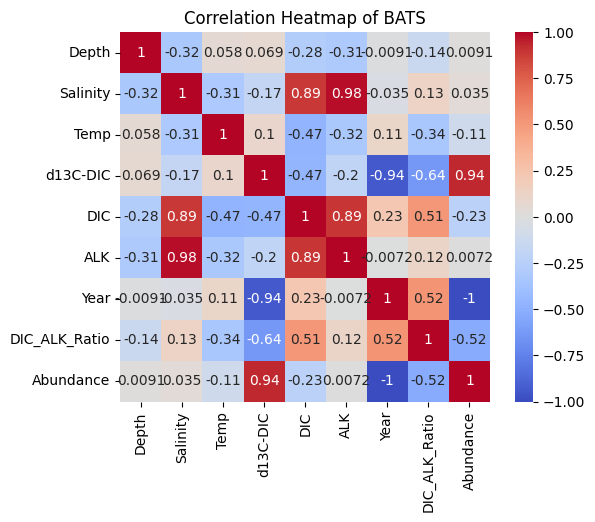

In [ ]:
#HeatMap (from Milestone 2)
matrix = combined_dataset.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of BATS")
plt.show()

#Part 4: Fitting Graphs
For the model complexity we will vary the number of features used for training, increasing from a small subset to all available features. This can highlight overfitting or underfitting.

If both the testing and training errors are high then the model is underfitting. If the testing error is high and the training error is low then the model is overfitting. If both the training and testing errors are low then the model is perfectly fitting.

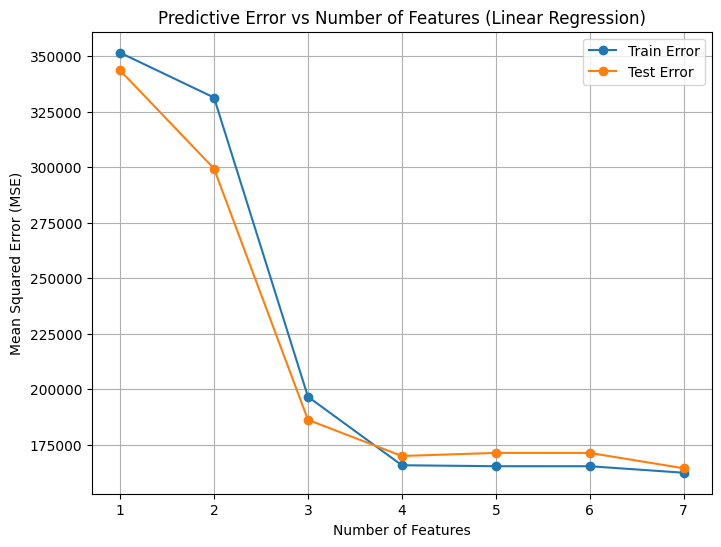

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming you have your features X and target variable y
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of the number of features (model complexity)
num_features = range(1, X_train.shape[1] + 1)
train_errors = []
test_errors = []

# Feature selection
for k in num_features:
    selector = SelectKBest(f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # Predict on the training set and calculate error
    y_train_pred = model.predict(X_train_selected)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Predict on the test set and calculate error
    y_test_pred = model.predict(X_test_selected)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(num_features, train_errors, label="Train Error", marker='o')
plt.plot(num_features, test_errors, label="Test Error", marker='o')
plt.title("Predictive Error vs Number of Features (Linear Regression)")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()


As the number of features are increased the training and testing error reach about 165,000 which is good as they have low MSE(The root MSE is about 400 which is good considering that Abundance ranges between 20000 and 30000 roughly). As both the training and testing errors are low our model is perfectly fitting

#Part 6: Conclusion

The first model demonstrates reasonable performance, with no signs of underfitting or overfitting. It effectively captures the general trends in the data, though there is potential for further improvement.

To enhance the model's accuracy, we plan to incorporate more refined data by using specific dates rather than just the year. This will allow the model to account for variations in Abundance values that may occur within a given year, providing more precise predictions for each sample. By training the Abundance model using fractional years (i.e., including months or days), we aim to better capture temporal nuances and improve model performance.

